In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [16]:
#монтируем с гугл диска чтоб не закачивать постоянно
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df_bp=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx', index_col=0)

In [18]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')

### Знакомство с данными

In [19]:
df.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,60.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

посмотрели  датасет, всё корректно, пропусков нет, проверим на дубликаты

In [21]:
df.duplicated().sum()

0

посмотрим описательную статистику

In [22]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


отсутсвуют пропуски везде, дубликатов тож нет

### 2. Визуализация
проанализируем  датасет, построим гистограммы

In [23]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

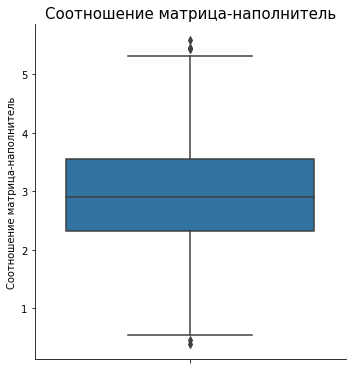

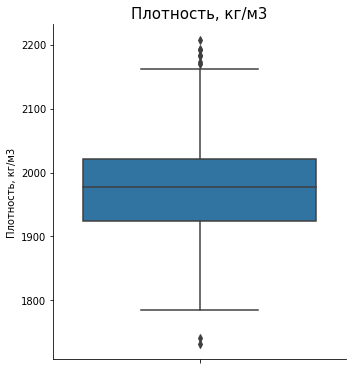

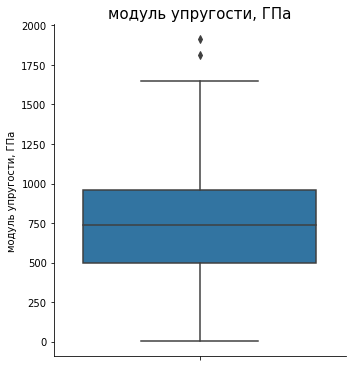

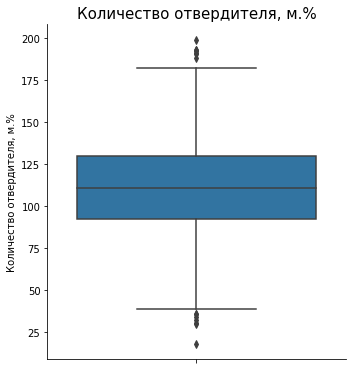

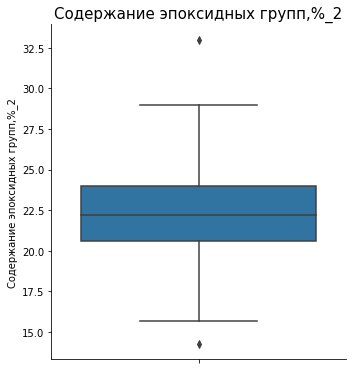

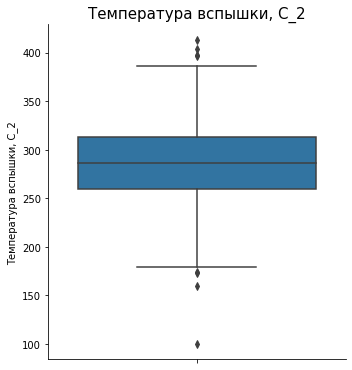

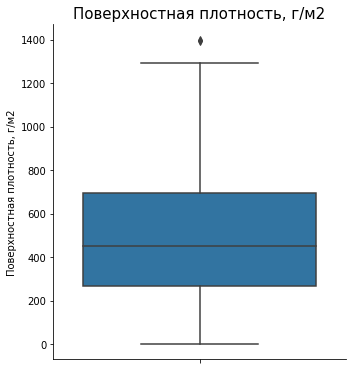

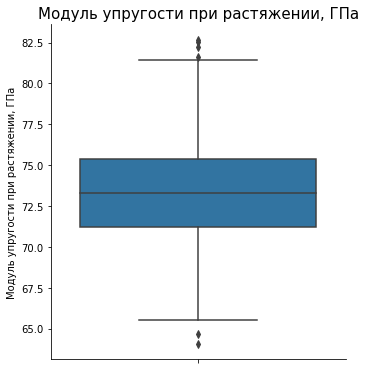

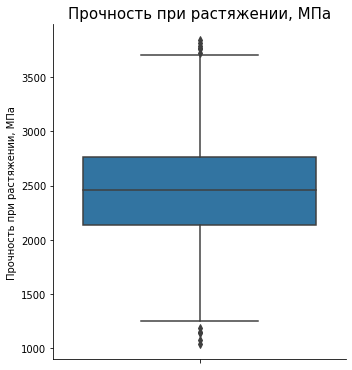

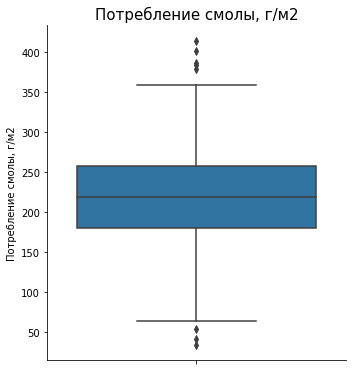

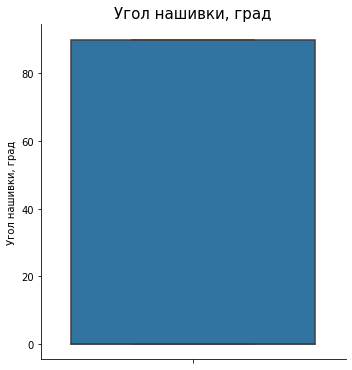

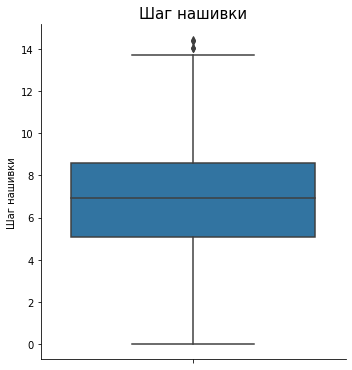

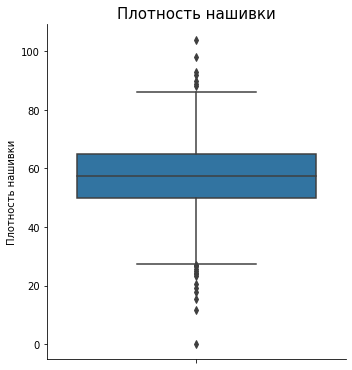

In [24]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)


видно, что кое какие выбросы есть

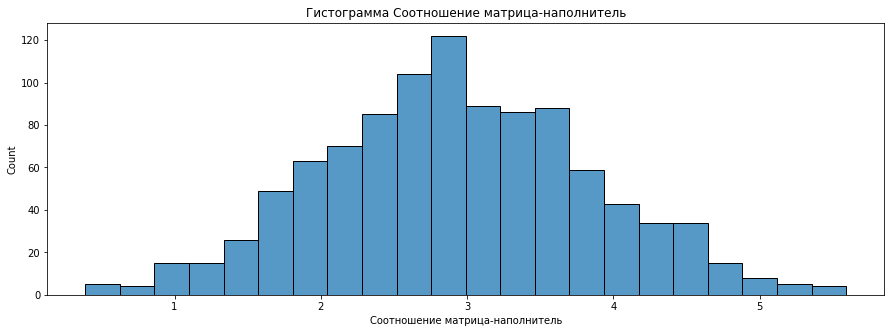

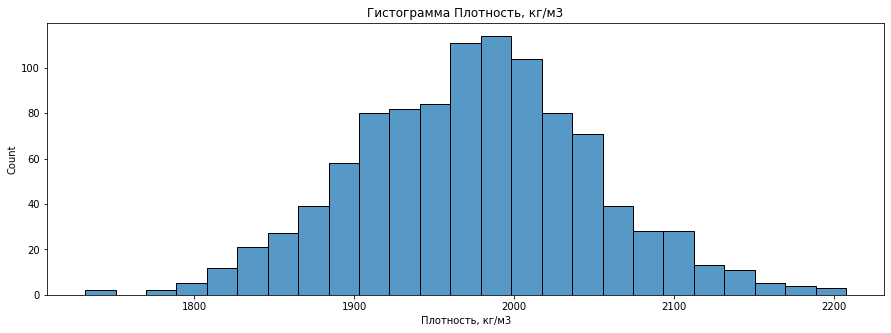

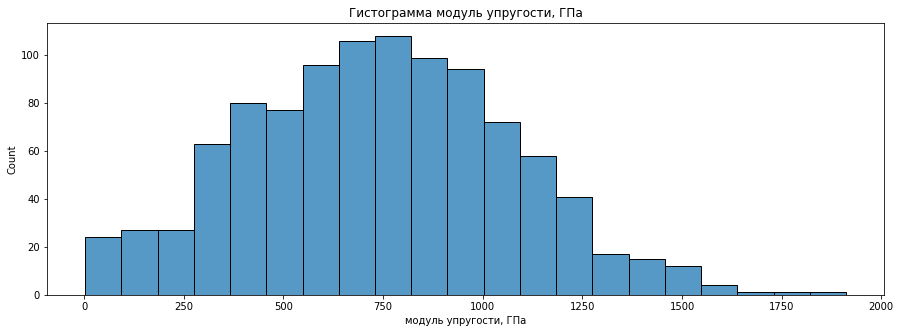

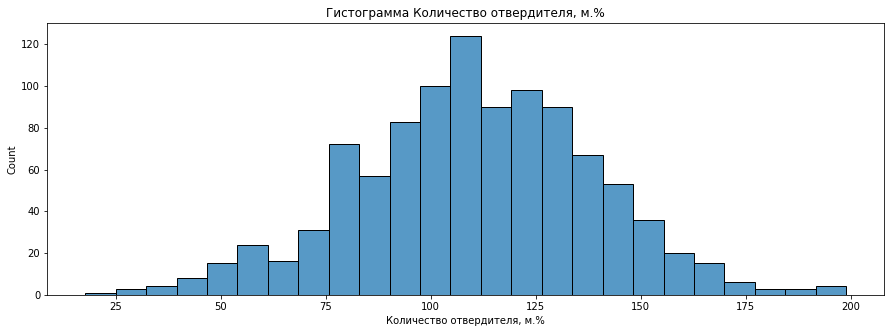

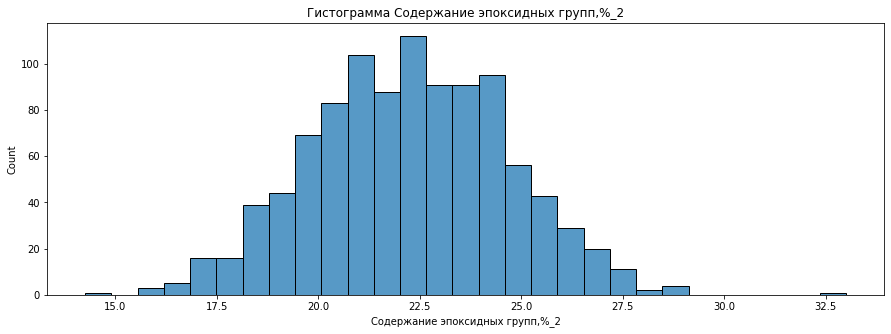

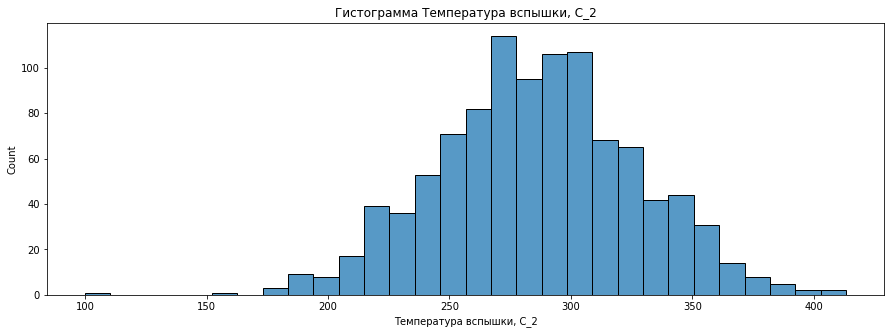

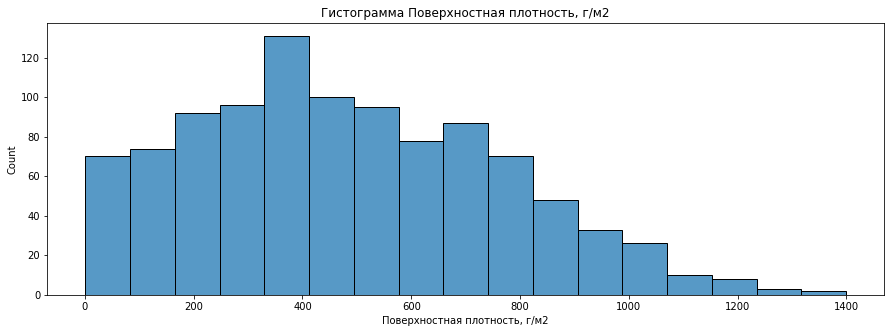

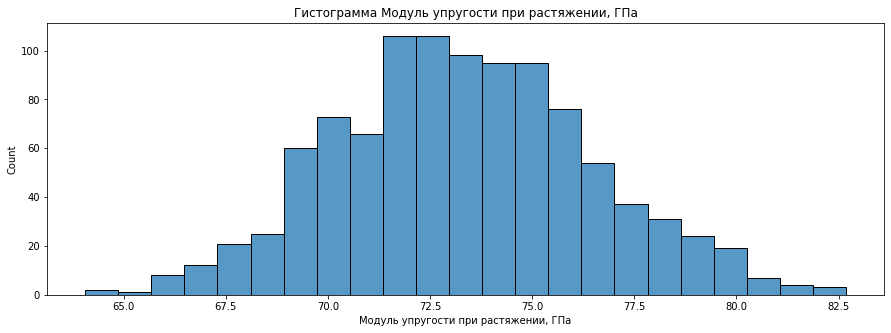

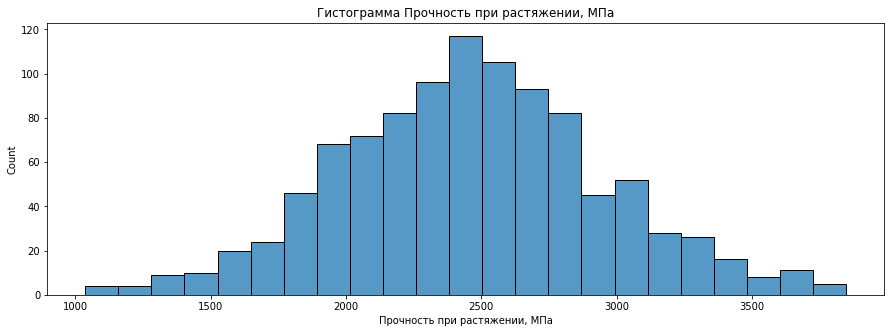

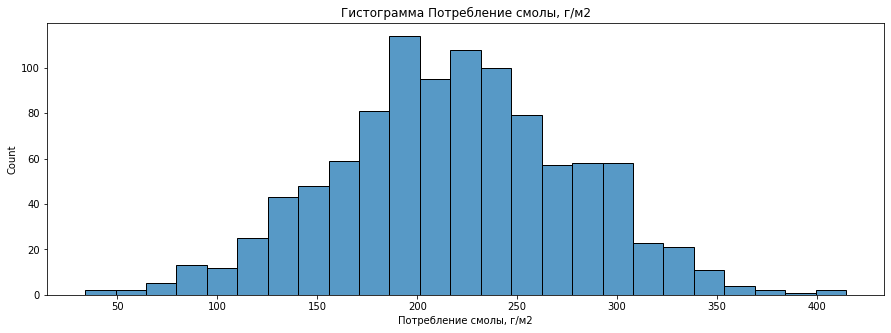

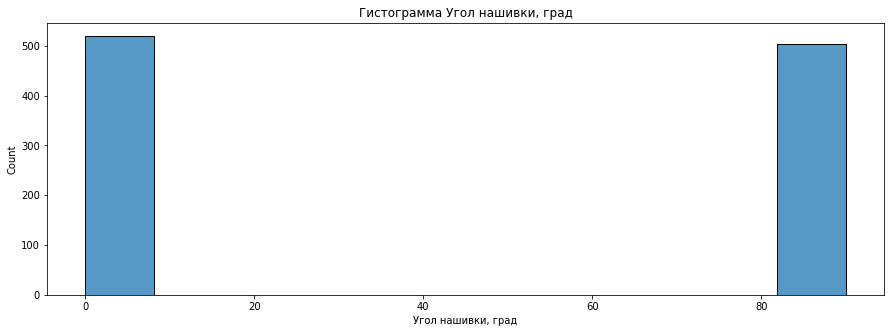

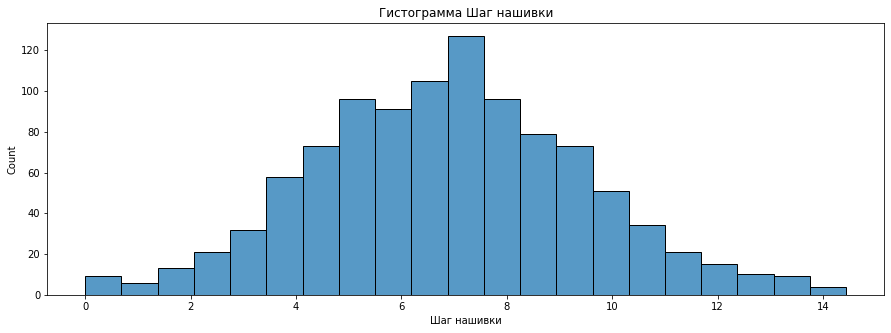

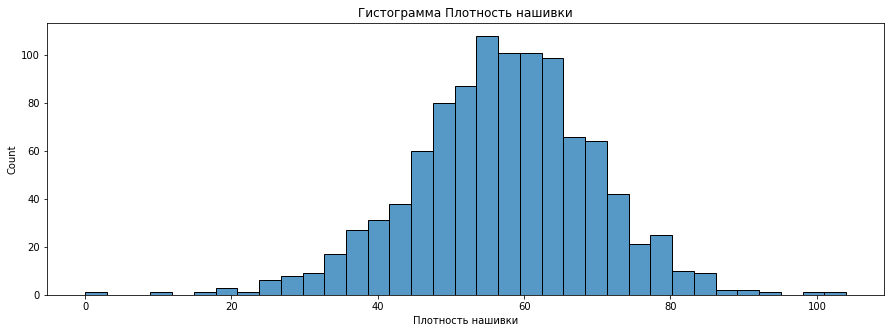

In [25]:
for col in df.columns: 
  plt.figure(figsize=(15, 5))
  plt.title("Гистограмма "+str(col))
  sns.histplot(data=df[col])
  plt.show()

видно, что данные распределены в основном нормально, только с углом нашивки что-то не то

построим парные графики

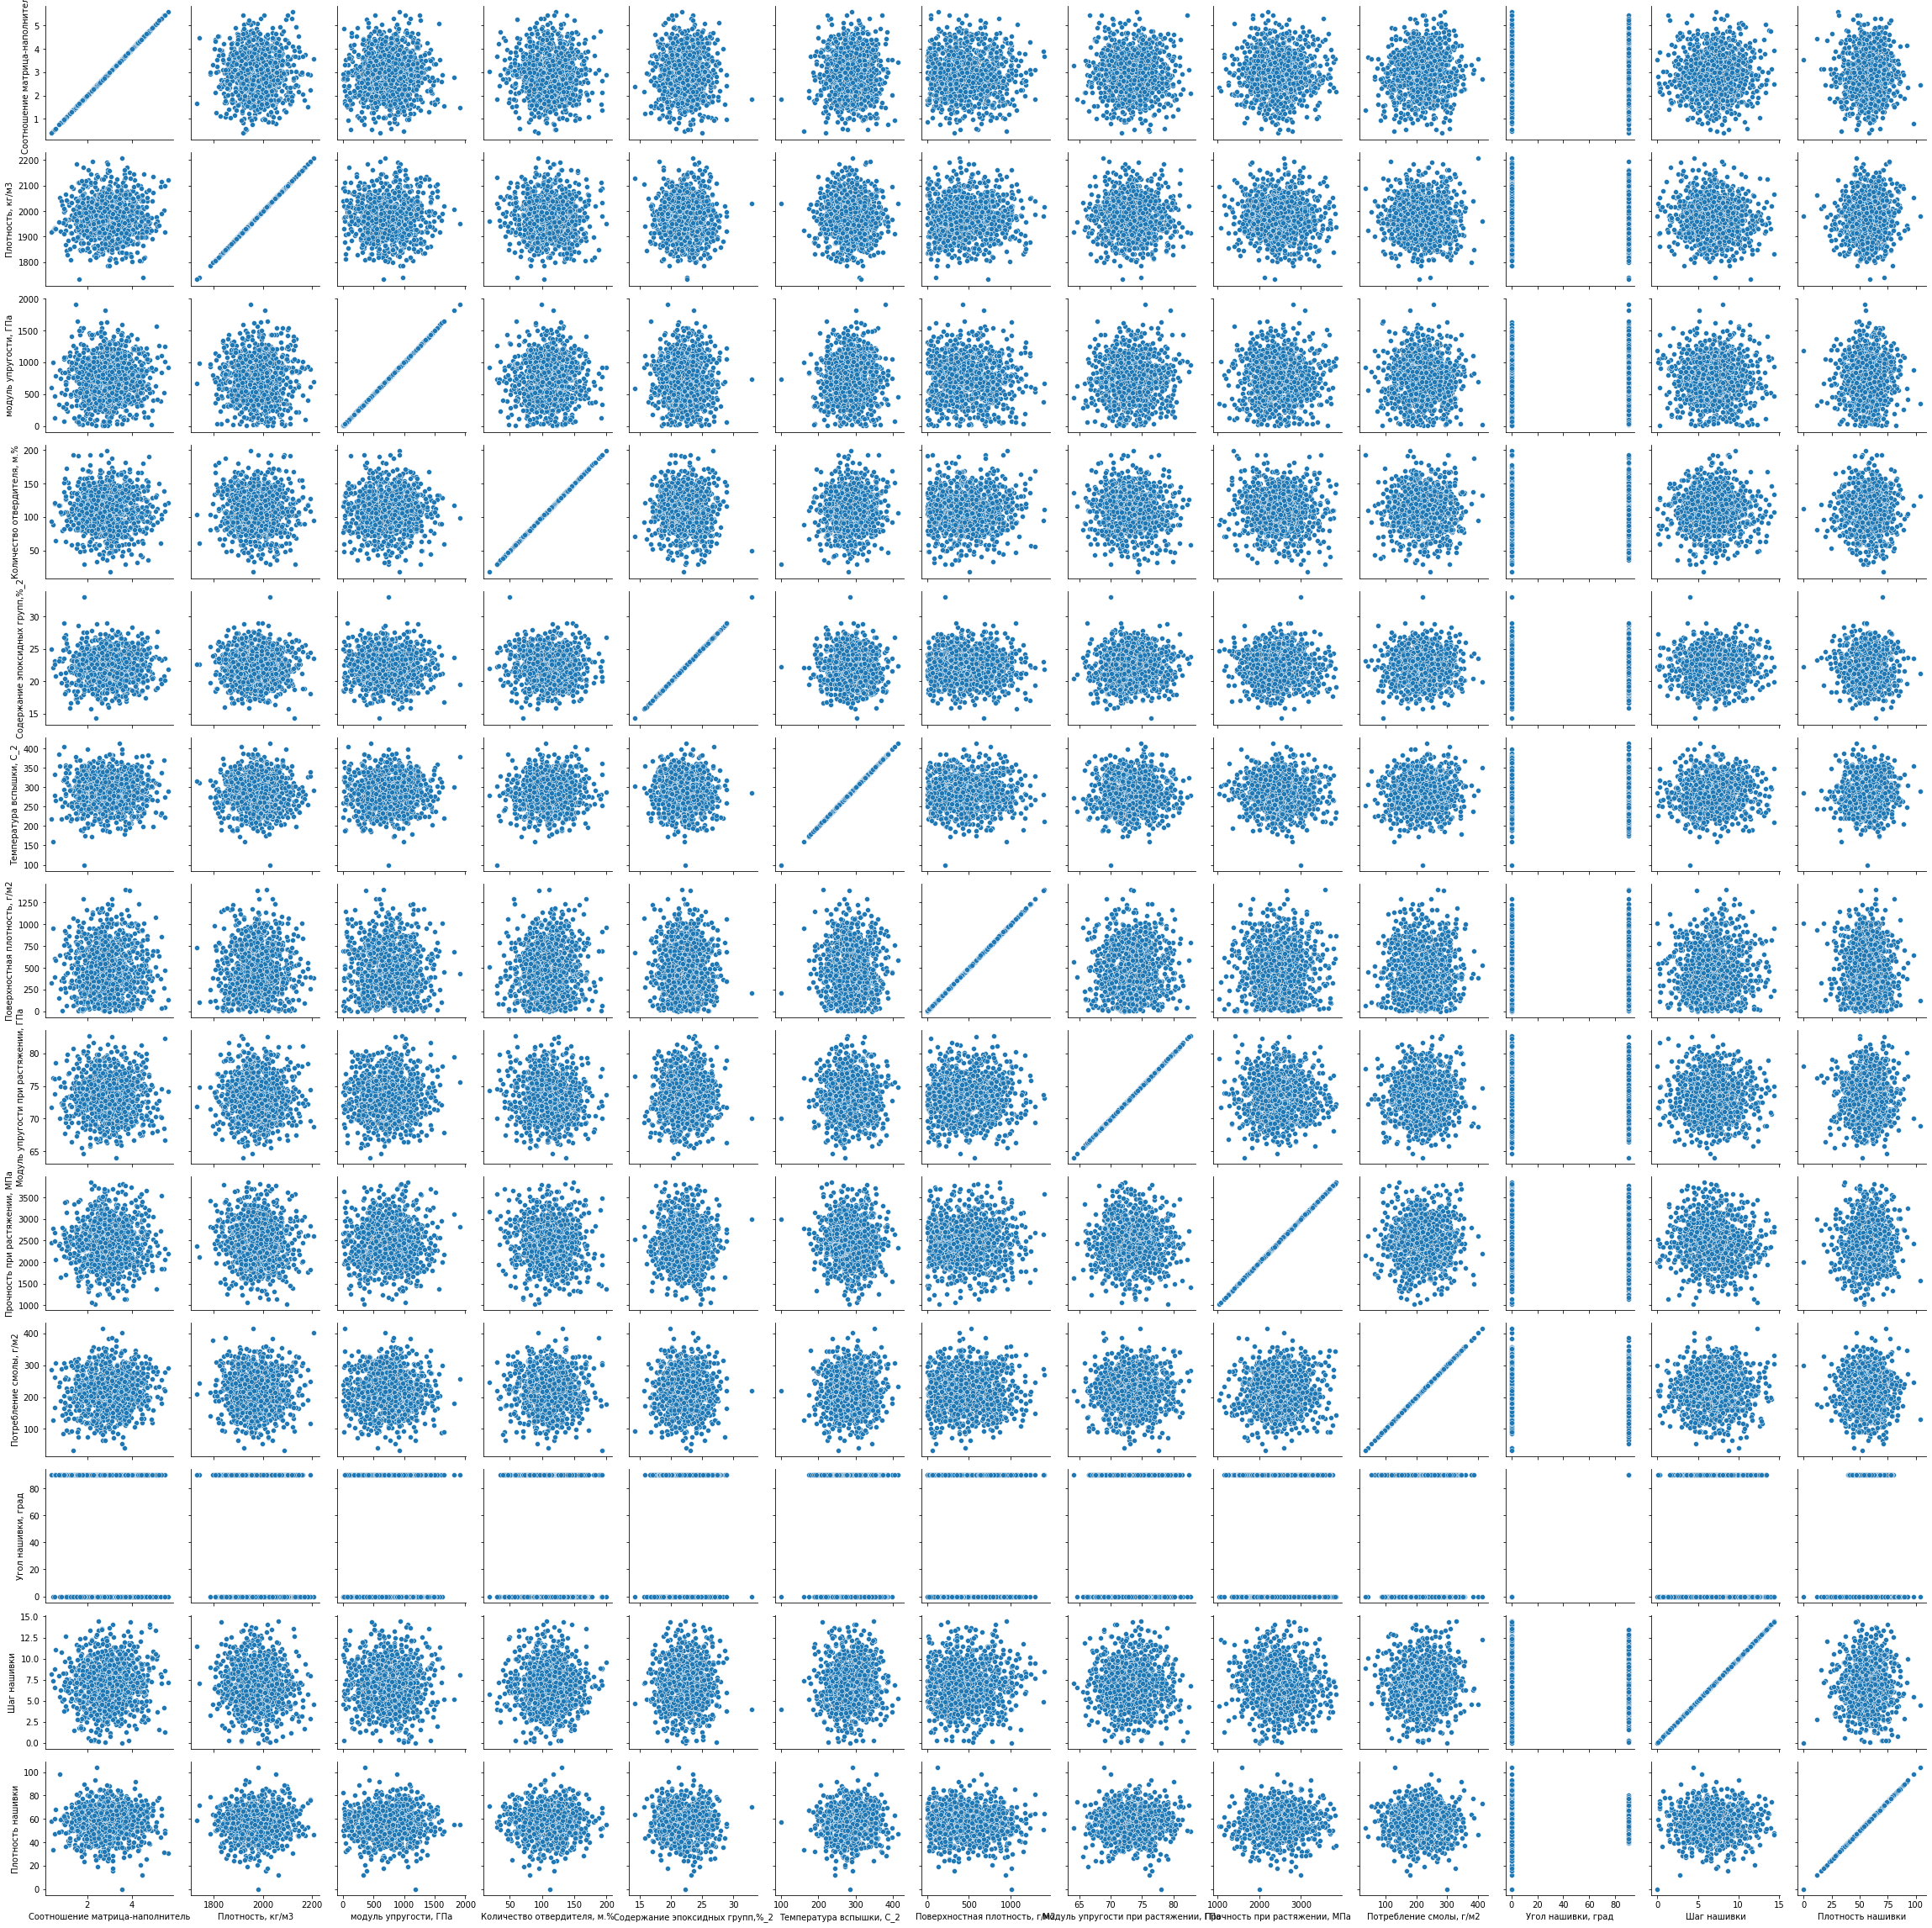

In [26]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

не особо информативно получилось

Проверим корреляции признаков

In [27]:
corr = df.corr()

<Axes: >

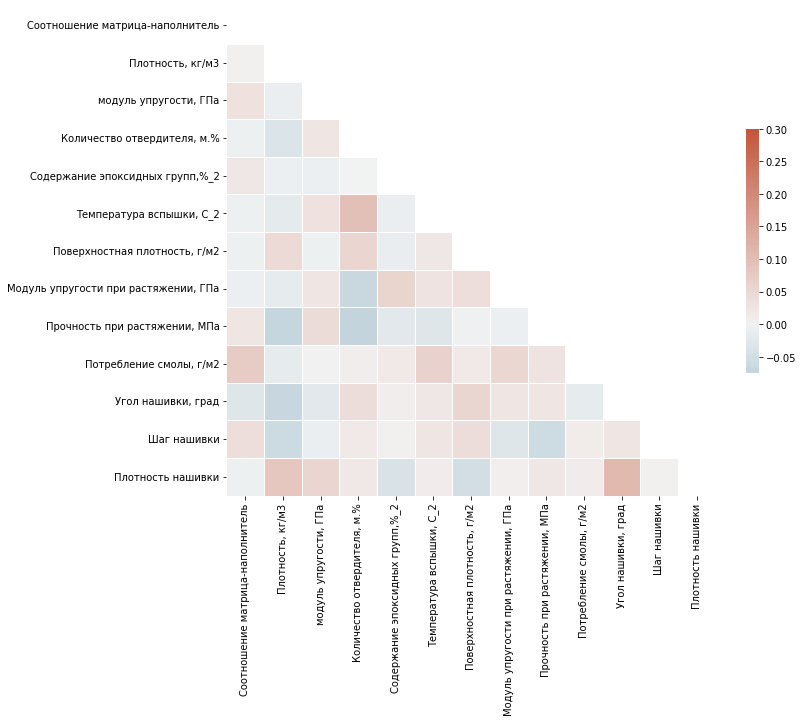

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

видно пары, количество отвердителя - температура вспышки, плотность нашивки - угол нашивки.

In [29]:
['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']

['Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']

# Предобработка данных

In [30]:
#Составим список признаков, у которых более 95% строк содержат одно и то же значение.
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Вывод - малоинформативные признаки отсутствуют!

очистим данные от выбросов, выбросы заменим nan 

In [31]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

проверим какое количество выбросов по каждому столбцу

In [32]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

количество выбросов довольно мало, можно просто удалить эти строки

In [33]:
df = df.dropna(axis = 0)

посмотрим опять на боксплоты

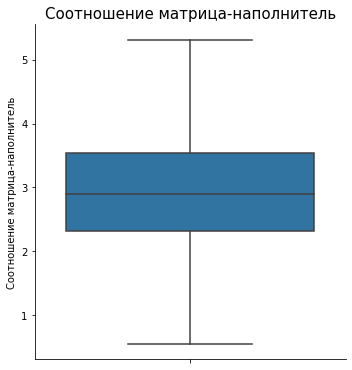

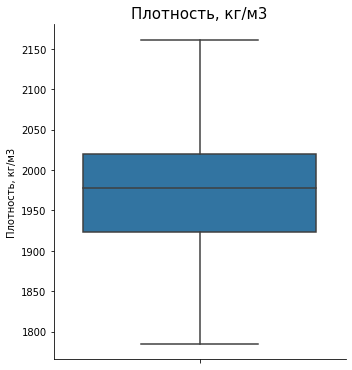

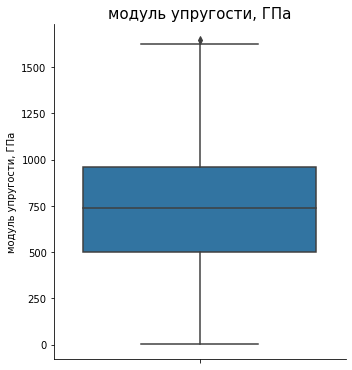

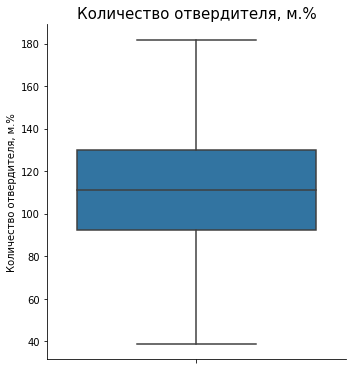

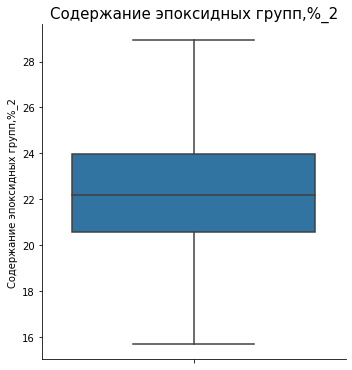

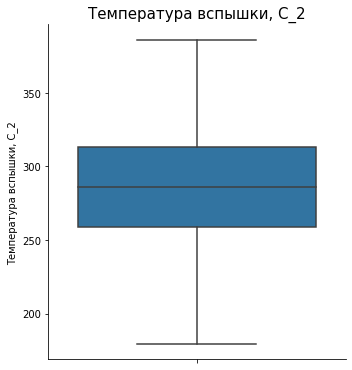

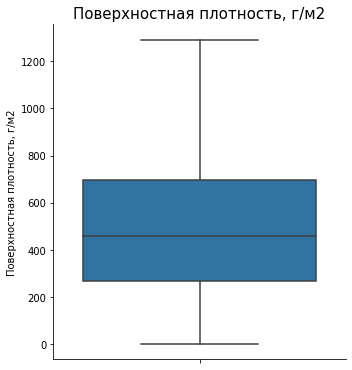

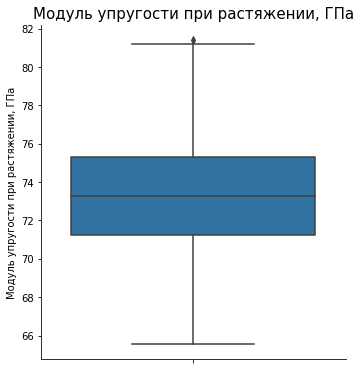

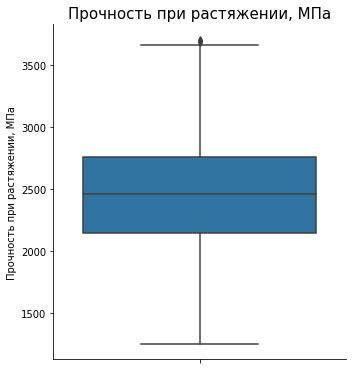

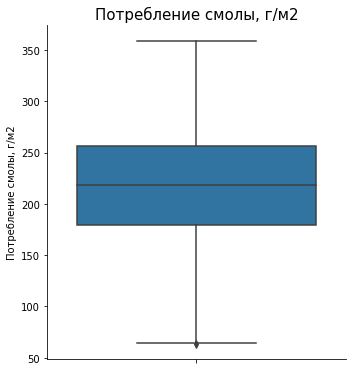

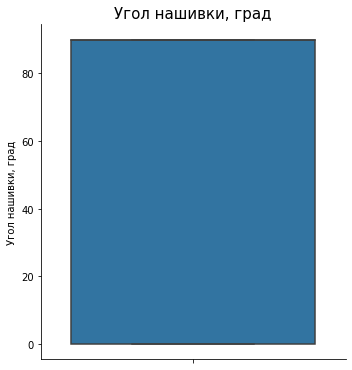

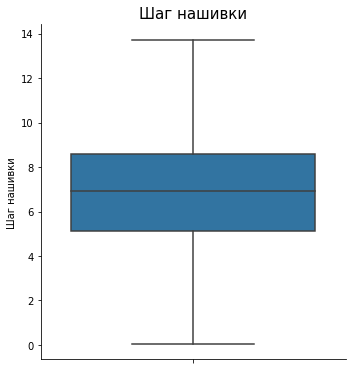

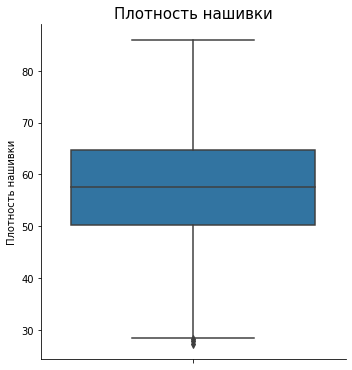

In [34]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)

всё хорошо, от шумов избавились

теперь нормализуем значения, очень большой разброс везде

In [35]:
scaler = MinMaxScaler()

norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 



In [36]:
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


нормализация выполнена.

# прогноз модуля упругости при растяжени

In [37]:

target = norm_df['Модуль упругости при растяжении, ГПа']
train = norm_df[['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']]


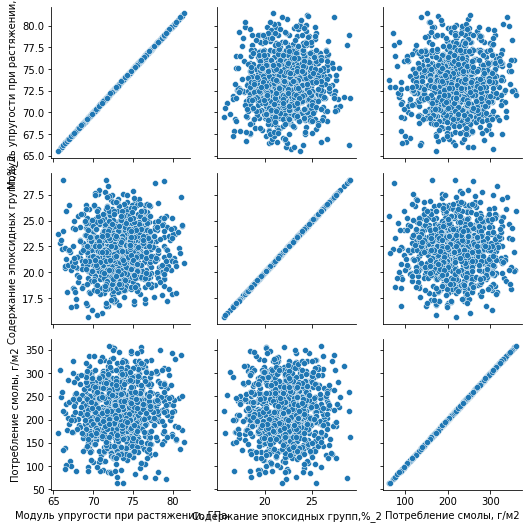

In [38]:
cols=['Модуль упругости при растяжении, ГПа','Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

In [39]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [40]:
Xtrn

,"Содержание эпоксидных групп,%_2","Потребление смолы, г/м2"
1007,0.337048,0.545188
293,0.375661,0.260071
904,0.590132,0.445855
44,0.052469,0.810484
578,0.492857,0.769445
...,...,...
163,0.486046,0.308175
148,0.876092,0.935553
693,0.745198,0.552902
159,0.353883,0.517842


In [41]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred = lin_reg_mod.predict(Xtest)

In [42]:
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))

test_set_r2 = r2_score(Ytest, pred)

In [43]:
print(test_set_rmse)
print(test_set_r2)

0.19666407067120262
-0.005299366700195263


Вывод - линейной зависимости нету! надо использовать другие алгоритмы

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrn)

In [45]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Ytrn)

LinearRegression()

In [46]:
X_p = poly_reg.fit_transform(Xtest)
pred = lin_reg2.predict(X_p)

In [47]:
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))

test_set_r2 = r2_score(Ytest, pred)

In [48]:
print(test_set_rmse)
print(test_set_r2)

0.1961264652603561
0.00018933978267210438


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(Xtrn))

In [50]:
XPCAreduced

array([[-3.4269925],
       [ 3.4269925]])

Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

Вывод - ни случайный лес ни линейная регрессия не справились, следовательно имеющихся данных недостаточно.
изучим теорию.

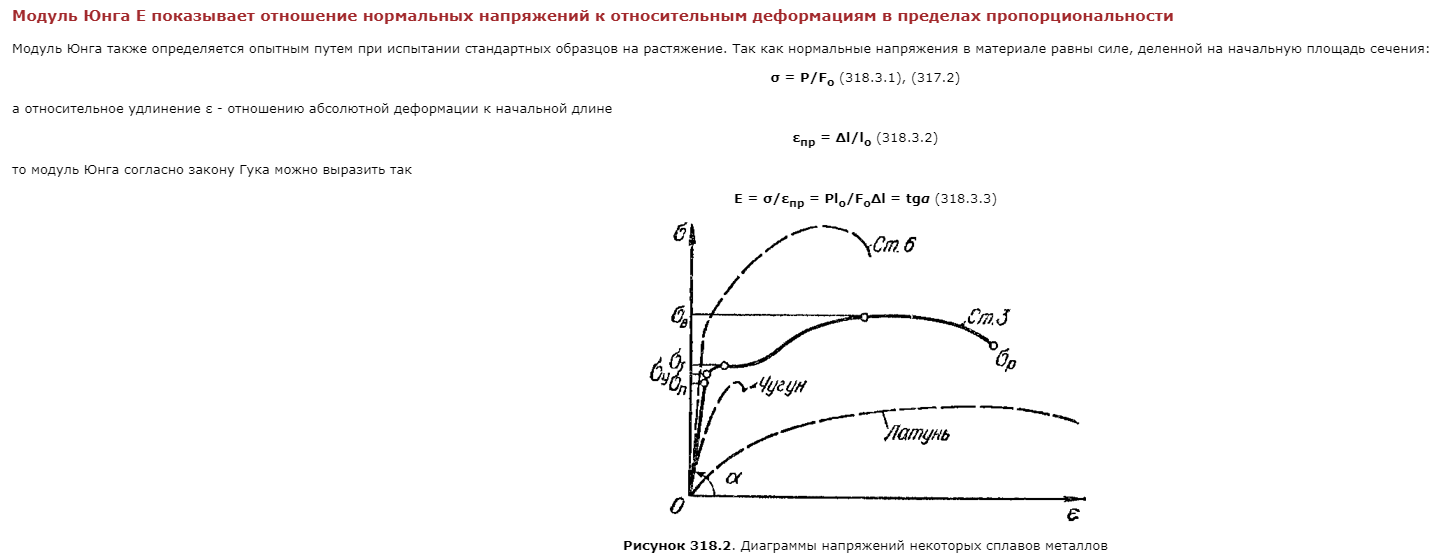

В основном, модуль упругости зависит от материала.

In [53]:
import pickle
import pandas as pd
import openpyxl
import numpy as np # библиотека для работы с матрицами
from scipy.optimize import minimize # Библиотека с методом оптимизации
import math
import random as rnd
import copy as cp
import sys


In [54]:
n_clusters = 25 # Число кластеров
nump = 9 # Количество коэффициентов для каждого частного геометрического полинома
dv = 0.00001 # Шаг вычисления производных
EPS = 0.0001 # Допустимая погрешность
km = 5 # Параметр метода ближайшего соседа


In [55]:
def load_data():
  WS1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx", skiprows=1, dtype=float)
  data = np.array(WS1);
  WS2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx", skiprows=1, dtype=float)
  data2 = np.array(WS2);
  result = np.zeros((data.shape[0],14));
  for i in range(0,data.shape[0]):
      result[i,:] = np.append(data[i,:], data2[i,1:4])
  return result


In [56]:
def load_data_wrapper():
  table = load_data() # инициализация наборов данных
  maxs = [table[:,i].max() for i in range(0,14)]
  mins = [table[:,i].min() for i in range(0,14)]
  for i in range(1,14):
      table[:,i] = 2*(table[:,i] - mins[i])/(maxs[i] - mins[i]) - 1
  training_inputs = [np.reshape(np.append(t[2:8], t[10:14]), (10, 1)) for t in table]
  training_results = [t[dest] for t in table]
  v = list(zip(training_inputs,training_results,list(range(0,len(training_inputs)))))
  rnd.shuffle(v)
  training_inputs, training_results, training_idxs = zip(*v)
  with open("trainedSEL." + str(dest) + ".dat", 'wb') as f:
       pickle.dump(training_idxs,f) 
  n = len(training_inputs)
  validating_inputs = training_inputs[int(2*n/3):n]
  validating_results = training_results[int(2*n/3):n]
  training_inputs = training_inputs[0:int(2*n/3)]
  training_results = training_results[0:int(2*n/3)]
  return training_inputs, training_results, validating_inputs, validating_results, mins, maxs

# Эвклидово расстояние
def get_dist(x1, x2):
    d = np.square(x1 - x2)
    return np.sum(d)

# Кластеризация алгоритмом k-means
def clusterize_kmeans(x, nc):
  centers = [np.array(rnd.choice(x)) for i in range(0, nc)]
  idxs = [0 for i in x]
  delta = 1000
  while (delta > EPS): # Пока центры кластеров не перестали изменяться
    for i in range(0, len(x)): # Классифицируем каждую точку
        idxs[i] = 0 # Сначала считаем ближайшим нулевой кластер
        min_dist = get_dist(x[i], centers[0]) # Расстояние до него
        for j in range(1, nc): # Находим кластер с минимальным расстоянием до центра
            cur_dist = get_dist(x[i], centers[j])
            if cur_dist < min_dist:
               idxs[i] = j
               min_dist = cur_dist
    # Перевычисляем центры кластеров
    old = cp.copy(centers)
    centers = [np.zeros((x[0].size,1)) for i in range(0, nc)]
    sizes = [0 for i in range(0, nc)]
    for i in range(0, len(x)):
        centers[idxs[i]] += x[i]
        sizes[idxs[i]] += 1
    for i in range(0, nc):
        if sizes[i] > 0:
           centers[i] /= sizes[i]
        else:
           centers[i] = np.array(rnd.choice(x))
    # Считаем, насколько сместились (в сумме) центры кластеров
    delta = 0
    for i in range(0, nc):
        delta += pow(get_dist(old[i], centers[i]), 2)
  return idxs

def trigo_interp(a, xx): # Интерполирующая частичная тригонометрическая функция
    arg1 = (a[1]*xx + a[2])
    arg2 = (a[4]*xx + a[5])
    arg3 = (a[7]*xx + a[8])
    return a[0]*np.cos(arg1)+a[3]*np.cos(arg2)+a[6]*np.cos(arg3)

def full_interp(c, ir, k, b, x): # Полная интерполирующая функция на кластере
    r = np.zeros((x.shape[0], 1))
    for i in range(0, ir):
        xx = x[:,i]
        r += 0.5*(trigo_interp(c[i],xx) + 1.0)/k[i] + b[i]
    return r

def approx_trigo_poly(x0, xx, yz): # Частичная аппроксимация простым геометрическим полиномом
    def goal(a):
        r = yz - trigo_interp(a,xx)
        result = np.sum(r*r)
        return result
    def jacob(a):
        y0 = goal(a)
        result = np.array([0.0 for i in range(0, nump)])
        for i in range(0, nump):
            a[i] += dv
            y1 = goal(a)
            a[i] -= dv
            result[i] = (y1 - y0)/dv
        return result
    return minimize(goal, x0, method='Powell')

In [60]:
dest = 8; # обучаем по модулю упругости

In [61]:
xd, yd, xv, yv, mins, maxs = load_data_wrapper()
idxs = clusterize_kmeans(xd, n_clusters)

nkoeffs = 0
qt = []
yt = []
kt = []
bt = []
ct = []
ir = []

In [62]:
for clust in range(0,n_clusters): # Перебираем все кластеры
# Для каждого кластера проводим упрощенную интерполяцию тригонометрическим полиномом
    x = []
    ys = []
    for i in range(0, len(xd)): # Выбираем данные текущего кластера
        if idxs[i] == clust:
           x.append(xd[i])
           ys.append(yd[i])
    nc = len(x)
    x = np.array(x)
    y = np.array(ys)
    yz = cp.copy(y).reshape((nc,1)) # Целевой вектор
    c = [np.zeros(nump) for i in range(0, xd[0].size)] # Матрица коэффициентов регрессионной функции
    k = [0.5 for i in range(0, xd[0].size+1)] # Масштабные множители
    b = [-1 for i in range(0, xd[0].size+1)] # Смещения
    y0 = np.zeros((nc,1))
    yp = 1000000 # Предыдущий прирост приближения
    for i in range(0, xd[0].size): # Цикл по входным переменным. На каждом шаге очередным геометрическим
# полиномом приближаем остаток, не учтенный предыдущими полиномами по предыдущим переменным
        xx = x[:,i]
        x0 = np.random.rand(nump)
        c[i] = approx_trigo_poly(x0, xx, yz).x
        if (abs(k[i]) < EPS):
           break
        y0 += 0.5*(trigo_interp(c[i], xx) + 1.0)/k[i] + b[i]
        d = y.reshape((nc,1)) - y0 # Вычисляем неучтенный остаток -- его попытаемся приблизить
                      # тригонометрическим полиномом по следующим переменным
        dd = np.sum(d*d)
        if dd > 1.1*yp: # Защищаемся от внезапного роста погрешности
           break
        yp = dd
        # Масштабируем остаток к диапазону [-1; 1]
        b[i+1] = np.min(d)
        k[i+1] = np.max(d)-np.min(d)
        if abs(k[i+1]) < EPS: # Если остаток мал, то можно ограничиться уже найденным фрагментом полинома
           break # Тогда завершаем обработку кластера
        else:
           k[i+1] = 1.0/k[i+1]
        yz = 2.0*k[i+1]*(d - b[i+1]) - 1.0
        yz = yz.reshape((nc,1))
        ireq = i # Запоминаем, сколько входных переменных требуют учета в текущем кластере
    nkoeffs += (nump+2)*ireq
    q = y.reshape((nc,1)) - full_interp(c,ireq,k,b,x)
    yt.append(ys)
    kt.extend(k)
    bt.extend(b)
    ct.append(c)
    ir.append(ireq)
    for i in range(0, nc):
        qt.append(q[i,0])
    print(clust, ". Средняя ошибка кластера = ", np.mean(np.abs(q)))

0 . Средняя ошибка кластера =  0.12217643170055571
1 . Средняя ошибка кластера =  0.026570857960012597
2 . Средняя ошибка кластера =  0.13219740697189056
3 . Средняя ошибка кластера =  0.19808081011002543
4 . Средняя ошибка кластера =  0.13298759192795467
5 . Средняя ошибка кластера =  0.1275986321718152
6 . Средняя ошибка кластера =  0.2328601080456807
7 . Средняя ошибка кластера =  0.10801549258818074
8 . Средняя ошибка кластера =  0.12735959260369276
9 . Средняя ошибка кластера =  0.18116493740898063
10 . Средняя ошибка кластера =  0.17663635058124563
11 . Средняя ошибка кластера =  0.025064184943911536
12 . Средняя ошибка кластера =  0.11537361876810182
13 . Средняя ошибка кластера =  0.1990631603923442
14 . Средняя ошибка кластера =  0.12850746363186846
15 . Средняя ошибка кластера =  0.11507951381504485
16 . Средняя ошибка кластера =  0.10828779277376123
17 . Средняя ошибка кластера =  0.16446110685422727
18 . Средняя ошибка кластера =  0.0962407428505336
19 . Средняя ошибка клас

In [63]:
delta = np.abs(np.array(qt))
print("Вычислено коэффициентов: ", nkoeffs)
print("Средняя ошибка: ", np.mean(delta))
# Сохраняем данные обученного алгоритма
with open("trainedIDXS." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(idxs,f) 
with open("trainedK." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(kt,f) 
with open("trainedB." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(bt,f) 
with open("trainedC." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(ct,f) 
with open("trainedIR." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(ir,f) 


Вычислено коэффициентов:  2475
Средняя ошибка:  0.15407618595735598


In [66]:
print("Проверка по тестовой выборке:", end='')
err = np.array([[0.0]])
for i in range(0, len(xv)):
    x = xv[i]
    # Методом k-ближайшего соседа находим нужный кластер
    dists = [get_dist(x, xd[i]) for i in range(0, len(xd))] # Находим расстояния до всех образцовых точек
    votes = [0 for i in range(0, n_clusters)] # Голоса, поданные за кластеры
    for m in range(0,km):
        min_i = 0
        for r in range(1, len(xd)):
            if dists[r] < dists[min_i]:
               min_i = r
        votes[idxs[min_i]] += 1
        dists[min_i] = 10000000 # Чтобы больше не считать этого найденного соседа ближайшим
    max_vote = np.max(votes)
    # Ищем кластер с наибольшим числом голосов "За"
    for c in range(0, n_clusters):
        if votes[c] == max_vote:
           clust = c
           break
    base = clust*(xd[0].size+1)
    predicted = full_interp(ct[clust],ir[clust],kt[base:base+xd[0].size+1],bt[base:base+xd[0].size+1],x.reshape((1,10)))
    err += np.abs(yv[i]-predicted)
err /= len(xv)
print(err)


Проверка по тестовой выборке:[[0.37183321]]


# Прогноз прочности при растяжении

In [67]:
target = norm_df['Прочность при растяжении, МПа']
train = norm_df.drop(['Прочность при растяжении, МПа'], axis=1)

In [68]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [69]:
slr = LinearRegression()

slr.fit(Xtrn, Ytrn)
y_train_pred = slr.predict(Xtrn)
y_test_pred = slr.predict(Xtest)

In [70]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Ytrn, y_train_pred),
        mean_squared_error(Ytest, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Ytrn, y_train_pred),
        r2_score(Ytest, y_test_pred)))

MSE train: 0.035, test: 0.036
R^2 train: 0.029, test: -0.020


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)
r2_score(Ytest, y_pred_forest)

-0.02684375546512552

In [71]:
dest = 9
xd, yd, xv, yv, mins, maxs = load_data_wrapper()
idxs = clusterize_kmeans(xd, n_clusters)

nkoeffs = 0
qt = []
yt = []
kt = []
bt = []
ct = []
ir = []

In [72]:
for clust in range(0,n_clusters): # Перебираем все кластеры
# Для каждого кластера проводим упрощенную интерполяцию тригонометрическим полиномом
    x = []
    ys = []
    for i in range(0, len(xd)): # Выбираем данные текущего кластера
        if idxs[i] == clust:
           x.append(xd[i])
           ys.append(yd[i])
    nc = len(x)
    x = np.array(x)
    y = np.array(ys)
    yz = cp.copy(y).reshape((nc,1)) # Целевой вектор
    c = [np.zeros(nump) for i in range(0, xd[0].size)] # Матрица коэффициентов регрессионной функции
    k = [0.5 for i in range(0, xd[0].size+1)] # Масштабные множители
    b = [-1 for i in range(0, xd[0].size+1)] # Смещения
    y0 = np.zeros((nc,1))
    yp = 1000000 # Предыдущий прирост приближения
    for i in range(0, xd[0].size): # Цикл по входным переменным. На каждом шаге очередным геометрическим
# полиномом приближаем остаток, не учтенный предыдущими полиномами по предыдущим переменным
        xx = x[:,i]
        x0 = np.random.rand(nump)
        c[i] = approx_trigo_poly(x0, xx, yz).x
        if (abs(k[i]) < EPS):
           break
        y0 += 0.5*(trigo_interp(c[i], xx) + 1.0)/k[i] + b[i]
        d = y.reshape((nc,1)) - y0 # Вычисляем неучтенный остаток -- его попытаемся приблизить
                      # тригонометрическим полиномом по следующим переменным
        dd = np.sum(d*d)
        if dd > 1.1*yp: # Защищаемся от внезапного роста погрешности
           break
        yp = dd
        # Масштабируем остаток к диапазону [-1; 1]
        b[i+1] = np.min(d)
        k[i+1] = np.max(d)-np.min(d)
        if abs(k[i+1]) < EPS: # Если остаток мал, то можно ограничиться уже найденным фрагментом полинома
           break # Тогда завершаем обработку кластера
        else:
           k[i+1] = 1.0/k[i+1]
        yz = 2.0*k[i+1]*(d - b[i+1]) - 1.0
        yz = yz.reshape((nc,1))
        ireq = i # Запоминаем, сколько входных переменных требуют учета в текущем кластере
    nkoeffs += (nump+2)*ireq
    q = y.reshape((nc,1)) - full_interp(c,ireq,k,b,x)
    yt.append(ys)
    kt.extend(k)
    bt.extend(b)
    ct.append(c)
    ir.append(ireq)
    for i in range(0, nc):
        qt.append(q[i,0])
    print(clust, ". Средняя ошибка кластера = ", np.mean(np.abs(q)))

0 . Средняя ошибка кластера =  0.18735373038366726
1 . Средняя ошибка кластера =  0.1454177398621279
2 . Средняя ошибка кластера =  0.09613943349486419
3 . Средняя ошибка кластера =  0.03820186837921293
4 . Средняя ошибка кластера =  0.15422339913470468
5 . Средняя ошибка кластера =  0.14680740615343124
6 . Средняя ошибка кластера =  0.16892518209303287
7 . Средняя ошибка кластера =  0.16264319787842152
8 . Средняя ошибка кластера =  0.16870475086681688
9 . Средняя ошибка кластера =  0.2272871664338884
10 . Средняя ошибка кластера =  0.17227110315515168
11 . Средняя ошибка кластера =  0.22551083688527954
12 . Средняя ошибка кластера =  0.058085637632193335
13 . Средняя ошибка кластера =  0.1642758764918252
14 . Средняя ошибка кластера =  0.08205980224544147
15 . Средняя ошибка кластера =  0.11819435533754115
16 . Средняя ошибка кластера =  0.175746985642976
17 . Средняя ошибка кластера =  0.14739371005171817
18 . Средняя ошибка кластера =  0.13195425786012474
19 . Средняя ошибка класте

In [73]:
delta = np.abs(np.array(qt))
print("Вычислено коэффициентов: ", nkoeffs)
print("Средняя ошибка: ", np.mean(delta))
# Сохраняем данные обученного алгоритма
with open("trainedIDXS." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(idxs,f) 
with open("trainedK." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(kt,f) 
with open("trainedB." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(bt,f) 
with open("trainedC." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(ct,f) 
with open("trainedIR." + str(dest) + ".dat", 'wb') as f:
    pickle.dump(ir,f) 

Вычислено коэффициентов:  2475
Средняя ошибка:  0.16246620940196713


In [74]:
print("Проверка по тестовой выборке:", end='')
err = np.array([[0.0]])
for i in range(0, len(xv)):
    x = xv[i]
    # Методом k-ближайшего соседа находим нужный кластер
    dists = [get_dist(x, xd[i]) for i in range(0, len(xd))] # Находим расстояния до всех образцовых точек
    votes = [0 for i in range(0, n_clusters)] # Голоса, поданные за кластеры
    for m in range(0,km):
        min_i = 0
        for r in range(1, len(xd)):
            if dists[r] < dists[min_i]:
               min_i = r
        votes[idxs[min_i]] += 1
        dists[min_i] = 10000000 # Чтобы больше не считать этого найденного соседа ближайшим
    max_vote = np.max(votes)
    # Ищем кластер с наибольшим числом голосов "За"
    for c in range(0, n_clusters):
        if votes[c] == max_vote:
           clust = c
           break
    base = clust*(xd[0].size+1)
    predicted = full_interp(ct[clust],ir[clust],kt[base:base+xd[0].size+1],bt[base:base+xd[0].size+1],x.reshape((1,10)))
    err += np.abs(yv[i]-predicted)
err /= len(xv)
print(err)

Проверка по тестовой выборке:[[0.37079694]]


Прочность при растяжении Rm (такж разрывная прочность) представляет собой характеристику материала для оценки прочностных свойств. Прочность при растяжении (англ.: tensile strength) обозначает максимальное механическое растягивающее напряжение, с которым можно нагружать образец. При превышении прочности при растяжении материал разрушается: приложение усилия снижается, пока образец, наконец, не порвется. Разумеется, на образце возникает пластичная (т.е. остаточная) деформация еще до достижения прочности при растяжении.

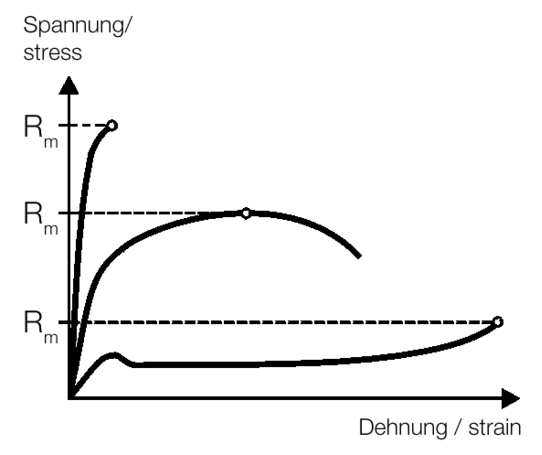

и мы видим, что одному значению х - прочность при растяжении, могут соответствовать множество материалов в различных экспериментах.

# Нейронная сеть матрица-наполнитель

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
target = norm_df['Соотношение матрица-наполнитель']
train = norm_df.drop(['Соотношение матрица-наполнитель'], axis=1)

In [ ]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

solver = 'lbfgs', метод решения MLP: L-BFGS лучше работает с небольшими данными, Adam более надежен, SGD имеет лучшую производительность, когда параметры настроены лучше (эффект классификации и количество итераций); логотип SGD Стохастический градиентный спуск.
alpha: Параметры L2: MLP может поддерживать регуляризацию, значение по умолчанию - L2, необходимо настроить определенные параметры
hidden_layer_sizes = (5, 5) скрытый слой 2 слоя, первый слой 5 нейронов, второй слой 5 нейрона), 2 скрытых слоя, есть 3 слоя нейронной сети


In [ ]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(Xtrn, Ytrn)
## Result
res = clf.predict(Xtest)


In [ ]:
r2_score(Ytest, res)

-0.06106443023640651

In [77]:
dest = 1 # Номер целевого столбца
columns = [2, 3, 4, 5, 6, 7, 10, 11, 12, 13] # Индексы столбцов со входными данными
k = 10 # Число ближайших соседей
AllowedPercent = 0.11

In [80]:
def load_data():
  WS1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx", skiprows=1, dtype=float)
  data = np.array(WS1);
  WS2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx", skiprows=1, dtype=float)
  data2 = np.array(WS2);
  result = np.zeros((data.shape[0],14));
  for i in range(0,data.shape[0]):
      result[i,:] = np.append(data[i,:], data2[i,1:4])
  return result

def load_data_wrapper():
  table = load_data() # инициализация наборов данных
  maxs = [table[:,i].max() for i in range(0,14)]
  mins = [table[:,i].min() for i in range(0,14)]
  for i in range(1,14):
      table[:,i] = 2*(table[:,i] - mins[i])/(maxs[i] - mins[i]) - 1
  training_inputs = [np.reshape(np.append(t[2:8], t[10:14]), (10, 1)) for t in table]
  training_results = [t[dest] for t in table]
  v = list(zip(training_inputs,training_results,list(range(0,len(training_inputs)))))
  rnd.shuffle(v)
  training_inputs, training_results, training_idxs = zip(*v)
  with open("trainedSELGRNN.dat", 'wb') as f:
       pickle.dump(training_idxs,f) 
  n = len(training_inputs)
  validating_inputs = training_inputs[int(2*n/3):n]
  validating_results = training_results[int(2*n/3):n]
  training_inputs = training_inputs[0:int(2*n/3)]
  training_results = training_results[0:int(2*n/3)]
  return training_inputs, training_results, validating_inputs, validating_results, mins, maxs

# Эвклидово расстояние
def get_dist(x1, x2):
    d = np.square(x1 - x2)
    return np.sum(d)


In [81]:
xd, yd, xv, yv, mins, maxs = load_data_wrapper()

# Считаем матрицу квадратов расстояний
dists2 = [[0.0 for j in range(0, len(xd))] for i in range(0, len(xd))]
for i in range(0, len(xd)):
    for j in range(i+1, len(xd)):
        dists2[i][j] = get_dist(xd[i], xd[j])
        dists2[j][i] = dists2[i][j]

def goal(R): # Вводим целевую функцию для поиска коэффициента R. Цель -- получить погрешность AllowedPercent
    V = np.array(dists2)*R
    weights = np.exp(-V)
    predicted = np.dot(weights,yd)/np.dot(weights,np.ones((len(xd),1))).reshape((1,len(xd)))
    d = yd - predicted
    eps = np.mean(np.abs(d))
    return (eps - AllowedPercent)*(eps - AllowedPercent)

R = minimize(goal, 1.0).x
np.savetxt("TrainedGRNN_R.txt", R)

print("Найдено R = ", R)

Найдено R =  [7.1262594]


In [82]:
V = np.array(dists2)*R
weights = np.exp(-V)
predicted = np.dot(weights,yd)/np.dot(weights,np.ones((len(xd),1))).reshape((1,len(xd)))
d = yd - predicted
print("Средняя ошибка = ", np.mean(np.abs(d)))

# Считаем матрицу квадратов расстояний
dists2 = [[0.0 for j in range(0, len(xd))] for i in range(0, len(xv))]
for i in range(0, len(xv)):
    for j in range(0, len(xd)):
        dists2[i][j] = get_dist(xv[i], xd[j])

V = np.array(dists2)*R
weights = np.exp(-V)
predicted = np.dot(weights,yd)/np.dot(weights,np.ones((len(xd),1))).reshape((1,len(xv)))
d = yv - predicted
print("Средняя ошибка по тестовым данным = ", np.mean(np.abs(d)))


Средняя ошибка =  0.10997740896419385
Средняя ошибка по тестовым данным =  0.29782200436943473
